In [6]:
pip install keras

     |████████████████████████████████| 378kB 1.6MB/s eta 0:00:01
     |████████████████████████████████| 51kB 9.4MB/s  eta 0:00:01
     |████████████████████████████████| 51kB 7.7MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tensorflow

     |████████████████████████████████| 120.8MB 699kB/s eta 0:00:01   |▉                               | 3.2MB 1.4MB/s eta 0:01:25     |██████▌                         | 24.7MB 12.9MB/s eta 0:00:08     |████████████████████▉           | 78.5MB 15.7MB/s eta 0:00:03     |█████████████████████████▍      | 95.9MB 17.0MB/s eta 0:00:02     |████████████████████████████▎   | 106.6MB 250kB/s eta 0:00:57     |█████████████████████████████   | 109.4MB 9.7MB/s eta 0:00:02
     |████████████████████████████████| 450kB 12.8MB/s eta 0:00:01
     |████████████████████████████████| 2.6MB 17.8MB/s eta 0:00:01
     |████████████████████████████████| 28.4MB 288kB/s eta 0:00:01
     |████████████████████████████████| 71kB 6.6MB/s eta 0:00:01
     |████████████████████████████████| 3.9MB 14.8MB/s eta 0:00:01
     |████████████████████████████████| 61kB 10.5MB/s eta 0:00:01
     |████████████████████████████████| 112kB 6.2MB/s eta 0:00:01
     |████████████████████████████████| 1.3MB 14.3MB/s eta 0:00:01
  

  Stored in directory: /Users/ranjaniramanathan/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: /Users/ranjaniramanathan/Library/Caches/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: /Users/ranjaniramanathan/Library/Caches/pip/wheels/8e/28/49/fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
Successfully built termcolor gast absl-py
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0
Note: you may need to restart the kernel to use updated packages.


In [21]:

import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from keras.preprocessing import image

p = Path("train/")
dirs = p.glob("*")
labels_dict = {'PNEUMONIA':0, 'NORMAL':1}
#labels the folders in the directory
image_data = []
labels = []    

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1][:len(str(folder_dir))]
    
    for img_path in folder_dir.glob("*.jpeg"): #For each image in the list of images: 
        img = image.load_img(img_path, target_size=(192,192))
        img_array = image.img_to_array(img) #Converts image into numerical values
        image_data.append(img_array) #Append the numerical representation of the image to an array
        labels.append(labels_dict[label])#The label list appends the label of that particular instance

In [22]:
print(len(labels))
print(len(image_data))

5258
5258


In [23]:

#convert data to numpy array 
image_data = np.array(image_data, dtype='float32')/255.0 #Why do we need this? 
labels = np.array(labels)
#192*192 is the size
print(image_data.shape, labels.shape) #This means it is a four dimensional?
print(image_data) #prints each example as a numeric 192*192 image - I seriously do not understand the output of the 
#image data. 

(5258, 192, 192, 3) (5258,)
[[[[0.80784315 0.80784315 0.80784315]
   [0.8156863  0.8156863  0.8156863 ]
   [0.8039216  0.8039216  0.8039216 ]
   ...
   [0.77254903 0.77254903 0.77254903]
   [0.78431374 0.78431374 0.78431374]
   [0.8352941  0.8352941  0.8352941 ]]

  [[0.8        0.8        0.8       ]
   [0.8039216  0.8039216  0.8039216 ]
   [0.8        0.8        0.8       ]
   ...
   [0.78039217 0.78039217 0.78039217]
   [0.83137256 0.83137256 0.83137256]
   [0.8156863  0.8156863  0.8156863 ]]

  [[0.8        0.8        0.8       ]
   [0.8        0.8        0.8       ]
   [0.8        0.8        0.8       ]
   ...
   [0.7764706  0.7764706  0.7764706 ]
   [0.81960785 0.81960785 0.81960785]
   [0.8352941  0.8352941  0.8352941 ]]

  ...

  [[0.07058824 0.07058824 0.07058824]
   [0.05098039 0.05098039 0.05098039]
   [0.04313726 0.04313726 0.04313726]
   ...
   [0.18431373 0.18431373 0.18431373]
   [0.1882353  0.1882353  0.1882353 ]
   [0.2        0.2        0.2       ]]

  [[0.05490196 0.

In [25]:

print(image_data[1])

[[[0.         0.         0.        ]
  [0.00784314 0.00784314 0.00784314]
  [0.05098039 0.05098039 0.05098039]
  ...
  [0.19215687 0.19215687 0.19215687]
  [0.1882353  0.1882353  0.1882353 ]
  [0.1764706  0.1764706  0.1764706 ]]

 [[0.         0.         0.        ]
  [0.03921569 0.03921569 0.03921569]
  [0.05098039 0.05098039 0.05098039]
  ...
  [0.21176471 0.21176471 0.21176471]
  [0.2        0.2        0.2       ]
  [0.19607843 0.19607843 0.19607843]]

 [[0.01960784 0.01960784 0.01960784]
  [0.04705882 0.04705882 0.04705882]
  [0.07843138 0.07843138 0.07843138]
  ...
  [0.21176471 0.21176471 0.21176471]
  [0.22745098 0.22745098 0.22745098]
  [0.20392157 0.20392157 0.20392157]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.13333334 0.13333334 0.13333334]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


In [26]:
## Randomly shuffle data

import random 
combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)


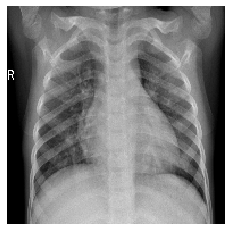

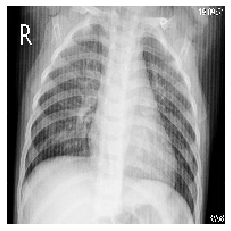

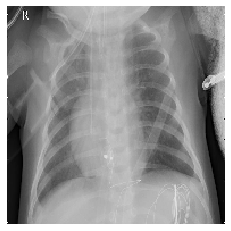

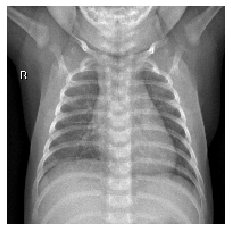

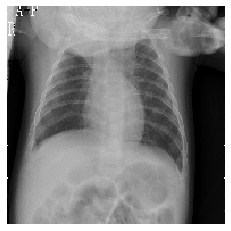

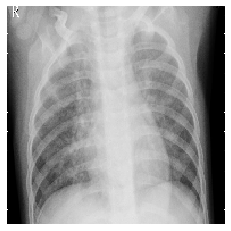

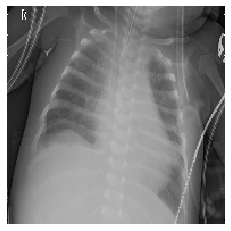

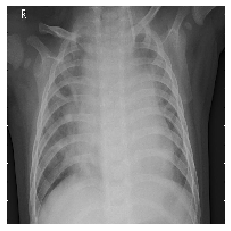

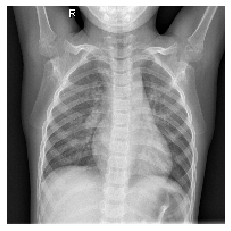

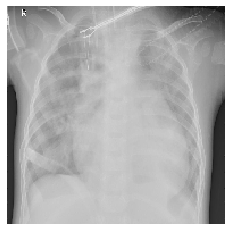

In [27]:
## Visualize the data

def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(10):
    drawImg(image_data[i])

In [28]:
## Data conversion for One vs One classification

M = image_data.shape[0]
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(5258, 110592)
(5258,)


In [29]:

from sklearn import svm
# Train SVM and get train accuracy 

svm_classifier = svm.SVC(kernel='linear', C=1.0) #learning rate =1 
svm_classifier.fit(image_data, labels)
ypred_sklearn = svm_classifier.predict(image_data)
svm_classifier.score(image_data,labels)

0.8615443134271586

In [35]:
"""
Next steps:
Do validation and test set - Set up the test data and validation data. 
Repeat the same thing for virus vs bacteria. 


This is the validation step
"""
p = Path("val/")
dirs = p.glob("*")
labels_dict = {'PNEUMONIA':0, 'NORMAL':1}
#labels the folders in the directory
image_data2 = []
labels2 = []    

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1][:len(str(folder_dir))]
    
    for img_path in folder_dir.glob("*.jpeg"): #For each image in the list of images: 
        img = image.load_img(img_path, target_size=(192,192))
        img_array = image.img_to_array(img) #Converts image into numerical values
        image_data2.append(img_array) #Append the numerical representation of the image to an array
        labels2.append(labels_dict[label])#The label list appends the label of that particular instance


print(len(labels2))
print(len(image_data2))

16
16


In [36]:

#convert data to numpy array 
image_data2 = np.array(image_data2, dtype='float32')/255.0 #Why do we need this? 
labels2 = np.array(labels2)
#192*192 is the size
print(image_data2.shape, labels2.shape) #This means it is a four dimensional?
print(image_data2) #prints each example as a numeric 192*192 image - I seriously do not understand the output of the 
#image data. 

(16, 192, 192, 3) (16,)
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.1882353  0.1882353  0.1882353 ]
   [0.12941177 0.12941177 0.12941177]
   [0.10588235 0.10588235 0.10588235]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.18039216 0.18039216 0.18039216]
   [0.13333334 0.13333334 0.13333334]
   [0.09803922 0.09803922 0.09803922]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.16862746 0.16862746 0.16862746]
   [0.12941177 0.12941177 0.12941177]
   [0.09411765 0.09411765 0.09411765]]

  ...

  [[0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]]

  [[0.00392157 0.0039

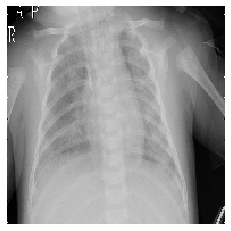

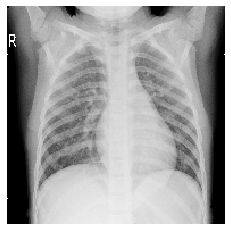

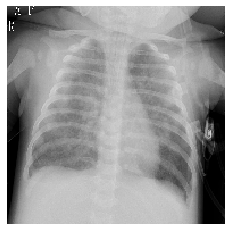

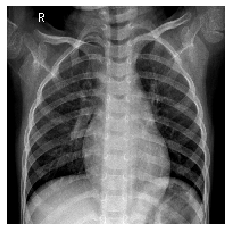

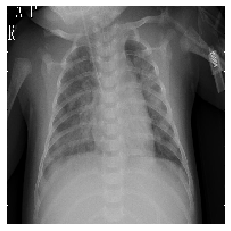

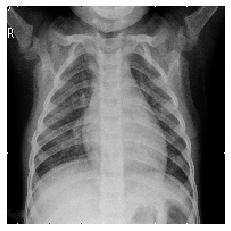

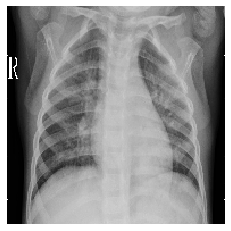

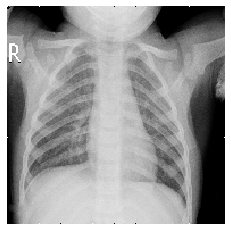

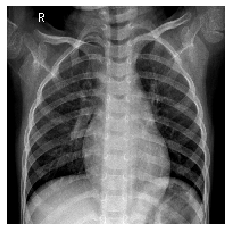

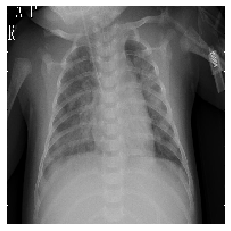

In [37]:
## Randomly shuffle data

import random 
combined = list(zip(image_data2, labels2))
random.shuffle(combined)

image_data2[:], labels2[:] = zip(*combined)

## Visualize the data

def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(10):
    drawImg(image_data2[i])


In [38]:

M = image_data2.shape[0]
image_data2 = image_data2.reshape(M,-1)
print(image_data2.shape)
print(labels2.shape)

#Get val accuracy 


ypredval_sklearn = svm_classifier.predict(image_data2)
svm_classifier.score(image_data2,labels2)

(16, 110592)
(16,)


0.6875

643
643
(643, 192, 192, 3) (643,)
[[[[0.42352942 0.42352942 0.42352942]
   [0.43137255 0.43137255 0.43137255]
   [0.43529412 0.43529412 0.43529412]
   ...
   [0.32156864 0.32156864 0.32156864]
   [0.34117648 0.34117648 0.34117648]
   [0.37254903 0.37254903 0.37254903]]

  [[0.44705883 0.44705883 0.44705883]
   [0.44313726 0.44313726 0.44313726]
   [0.40392157 0.40392157 0.40392157]
   ...
   [0.29803923 0.29803923 0.29803923]
   [0.32941177 0.32941177 0.32941177]
   [0.34509805 0.34509805 0.34509805]]

  [[0.44313726 0.44313726 0.44313726]
   [0.41568628 0.41568628 0.41568628]
   [0.41960785 0.41960785 0.41960785]
   ...
   [0.2627451  0.2627451  0.2627451 ]
   [0.30980393 0.30980393 0.30980393]
   [0.31764707 0.31764707 0.31764707]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.     

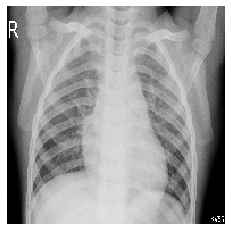

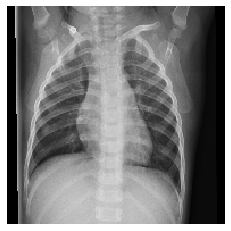

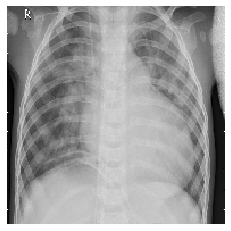

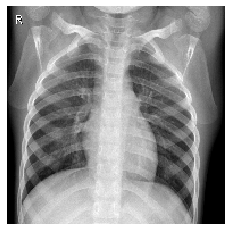

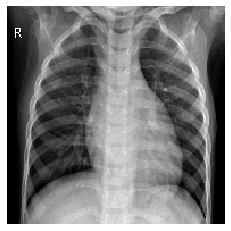

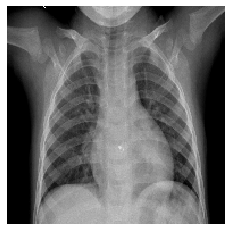

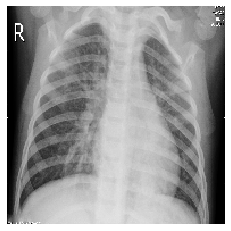

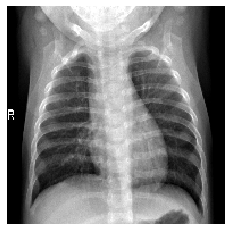

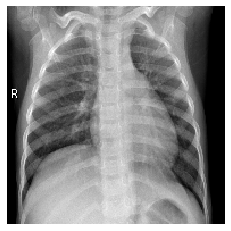

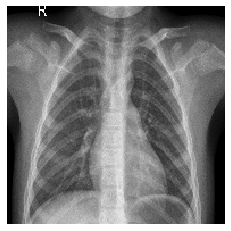

(643, 110592)
(643,)


In [39]:
"""
Next steps:
Do validation and test set - Set up the test data and validation data. 
Repeat the same thing for virus vs bacteria. 


This is the test step
"""

import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from keras.preprocessing import image

p = Path("test/")
dirs = p.glob("*")
labels_dict = {'PNEUMONIA':0, 'NORMAL':1}
#labels the folders in the directory
image_data3 = []
labels3 = []    

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1][:len(str(folder_dir))]
    
    for img_path in folder_dir.glob("*.jpeg"): #For each image in the list of images: 
        img = image.load_img(img_path, target_size=(192,192))
        img_array = image.img_to_array(img) #Converts image into numerical values
        image_data3.append(img_array) #Append the numerical representation of the image to an array
        labels3.append(labels_dict[label])#The label list appends the label of that particular instance


print(len(labels3))
print(len(image_data3))


#convert data to numpy array 
image_data3 = np.array(image_data3, dtype='float32')/255.0 #Why do we need this? 
labels3 = np.array(labels3)
#192*192 is the size
print(image_data3.shape, labels3.shape) #This means it is a four dimensional?
print(image_data3) #prints each example as a numeric 192*192 image - I seriously do not understand the output of the 
#image data. 

## Randomly shuffle data

import random 
combined = list(zip(image_data3, labels3))
random.shuffle(combined)

image_data3[:], labels3[:] = zip(*combined)

## Visualize the data

def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(10):
    drawImg(image_data3[i])

M = image_data3.shape[0]
image_data3 = image_data3.reshape(M,-1)
print(image_data3.shape)
print(labels3.shape)



In [41]:
ypredval_sklearn = svm_classifier.predict(image_data3)
print(svm_classifier.score(image_data3,labels3))

0.6640746500777605
